# Bank-marketing Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
target count
no     39922
yes     5289
Name: y, dtype: int64


<AxesSubplot:ylabel='y'>

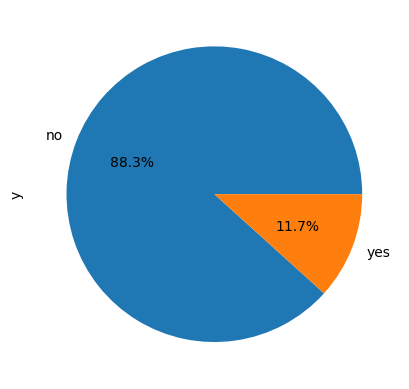

In [2]:
df = pd.read_csv("../Cleaned/Bank-marketing/bank-full.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['y'].value_counts())
df['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## marital

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


<AxesSubplot:ylabel='marital'>

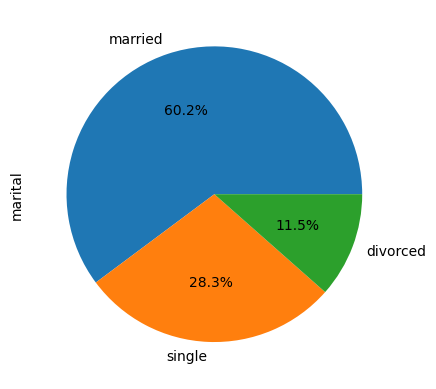

In [3]:
print(df['marital'].value_counts())
df['marital'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering marital = married

no     24459
yes     2755
Name: y, dtype: int64


<AxesSubplot:ylabel='y'>

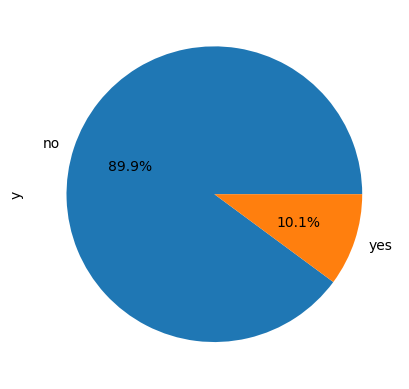

In [4]:
print(df.loc[df['marital']=="married"]['y'].value_counts())
df.loc[df['marital']=="married"]['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering marital = single

no     10878
yes     1912
Name: y, dtype: int64


<AxesSubplot:ylabel='y'>

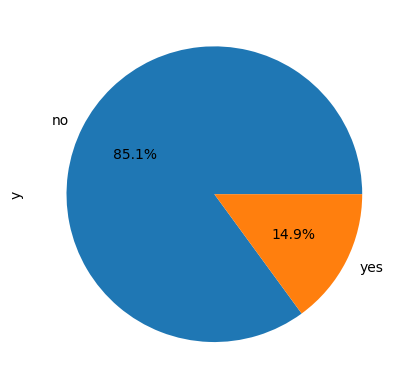

In [5]:
print(df.loc[df['marital']=="single"]['y'].value_counts())
df.loc[df['marital']=="single"]['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering marital = divorced

no     4585
yes     622
Name: y, dtype: int64


<AxesSubplot:ylabel='y'>

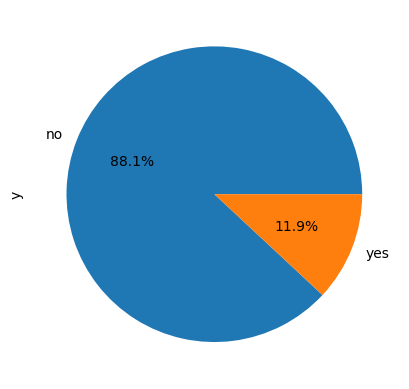

In [6]:
print(df.loc[df['marital']=="divorced"]['y'].value_counts())
df.loc[df['marital']=="divorced"]['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = yes

let y- = no

let s0 = married

let s1 = not married

In [7]:
# p(y+|s0) -> p(yes|married)
p1 = len(df.loc[(df['marital']=="married") & (df['y']=="yes")]) / len(df.loc[df['marital']=="married"])
#print(p1)
# p(y-|s1) -> p(no|!married)
p2 = len(df.loc[(df['marital']!="married") & (df['y']=="no")]) / len(df.loc[df['marital']!="married"])
#print(p2)
# p(y+|s1) -> p(yes|!married)
p3 = len(df.loc[(df['marital']!="married") & (df['y']=="yes")]) / len(df.loc[df['marital']!="married"])
#print(p3)
# p(y-|s0) -> p(no|married)
p4 = len(df.loc[(df['marital']=="married") & (df['y']=="no")]) / len(df.loc[df['marital']=="married"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.687


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = yes

let y- = no

let s0 = married

let s1 = not married

In [8]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.719


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = yes

let y- = no

let s0 = single

let s1 = not single

In [9]:
# p(y+|s0) -> p(yes|single)
p1 = len(df.loc[(df['marital']=="single") & (df['y']=="yes")]) / len(df.loc[df['marital']=="single"])
#print(p1)
# p(y-|s1) -> p(no|!single)
p2 = len(df.loc[(df['marital']!="single") & (df['y']=="no")]) / len(df.loc[df['marital']!="single"])
#print(p2)
# p(y+|s1) -> p(yes|!single)
p3 = len(df.loc[(df['marital']!="single") & (df['y']=="yes")]) / len(df.loc[df['marital']!="single"])
#print(p3)
# p(y-|s0) -> p(no|single)
p4 = len(df.loc[(df['marital']=="single") & (df['y']=="no")]) / len(df.loc[df['marital']=="single"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.512


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = yes

let y- = no

let s0 = single

let s1 = not single

In [10]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.435


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = yes

let y- = no

let s0 = divorced

let s1 = not divorced

In [11]:
# p(y+|s0) -> p(yes|divorced)
p1 = len(df.loc[(df['marital']=="divorced") & (df['y']=="yes")]) / len(df.loc[df['marital']=="divorced"])
#print(p1)
# p(y-|s1) -> p(no|!divorced)
p2 = len(df.loc[(df['marital']!="divorced") & (df['y']=="no")]) / len(df.loc[df['marital']!="divorced"])
#print(p2)
# p(y+|s1) -> p(yes|!divorced)
p3 = len(df.loc[(df['marital']!="divorced") & (df['y']=="yes")]) / len(df.loc[df['marital']!="divorced"])
#print(p3)
# p(y-|s0) -> p(no|divorced)
p4 = len(df.loc[(df['marital']=="divorced") & (df['y']=="no")]) / len(df.loc[df['marital']=="divorced"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.027


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = yes

let y- = no

let s0 = divorced

let s1 = not divorced

In [12]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.024


### Proxies

Most of the proxies found for marital include (a combination of):
 - job
 - month
 - education
 - duration
 - housing


Best model (min depth) found with a node at depth 2 with 50 samples.

	** job_student > 0.5 , month_sep > 0.5 ,  #impurity: 0.0, #samples: 50.

Best model (max sample) found with 274 sample in a node at depth 6.

    ** month_aug > 0.5 , poutcome_unknown > 0.5 , campaign > 3.5 , education_primary > 0.5 , default_yes <= 0.5 , day > 6.5 ,  #impurity: 0.007272630401193414, #samples: 274.

Others

    ** month_aug > 0.5 , poutcome_unknown > 0.5 , campaign > 3.5 , education_primary > 0.5 , default_yes <= 0.5 , day > 6.5 , balance <= 5704.0 ,  #impurity: 0.0, #samples: 254.



For proxy: job == student & month == sep

single    50
Name: marital, dtype: int64


<AxesSubplot:ylabel='marital'>

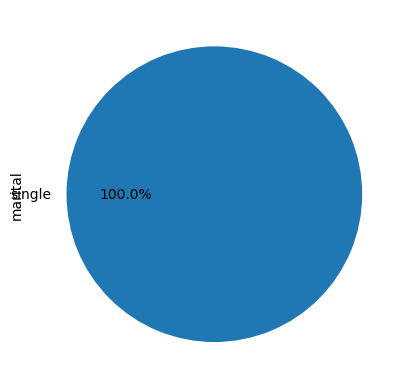

In [15]:
print(df.loc[(df['job']=="student") & (df['month']=="sep")]['marital'].value_counts())
df.loc[(df['job']=="student") & (df['month']=="sep")]['marital'].value_counts().plot(kind='pie',autopct='%1.1f%%')

no     32
yes    18
Name: y, dtype: int64


<AxesSubplot:ylabel='y'>

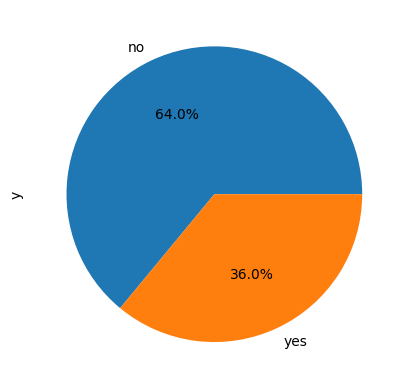

In [16]:
print(df.loc[(df['job']=="student") & (df['month']=="sep")]['y'].value_counts())
df.loc[(df['job']=="student") & (df['month']=="sep")]['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = yes

let y- = no

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [17]:
# p(y+|s0) -> p(yes|Proxy)
p1 = len(df.loc[(df['job']=="student") & (df['month']=="sep") & (df['y']=="yes")]) / len(df.loc[(df['job']=="student") & (df['month']=="sep")])
#print(p1)
# p(y-|s1) -> p(no|!Proxy)
p2 = len(df.loc[((df['job']!="student") | (df['month']!="sep")) & (df['y']=="no")]) / len(df.loc[((df['job']!="student") | (df['month']!="sep"))])
#print(p2)
# p(y+|s1) -> p(yes|!Proxy)
p3 = len(df.loc[((df['job']!="student") | (df['month']!="sep")) & (df['y']=="yes")]) / len(df.loc[((df['job']!="student") | (df['month']!="sep"))])
#print(p3)
# p(y-|s0) -> p(no|Proxy)
p4 = len(df.loc[(df['job']=="student") & (df['month']=="sep") & (df['y']=="no")]) / len(df.loc[(df['job']=="student") & (df['month']=="sep")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 4.257


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = yes

let y- = no

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [18]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 3.084


considering just the universe of single (proxy)

In [19]:
# p(y+|s0) -> p(yes|Proxy)
p1 = len(df.loc[(df['job']=="student") & (df['month']=="sep") & (df['y']=="yes") & (df['marital']=="single")]) / len(df.loc[(df['job']=="student") & (df['month']=="sep") & (df['marital']=="single")])
#print(p1)
# p(y-|s1) -> p(no|!Proxy)
p2 = len(df.loc[((df['job']!="student") | (df['month']!="sep")) & (df['y']=="no") & (df['marital']=="single")]) / len(df.loc[((df['job']!="student") | (df['month']!="sep")) & (df['marital']=="single")])
#print(p2)
# p(y+|s1) -> p(yes|!Proxy)
p3 = len(df.loc[((df['job']!="student") | (df['month']!="sep")) & (df['y']=="yes") & (df['marital']=="single")]) / len(df.loc[((df['job']!="student") | (df['month']!="sep")) & (df['marital']=="single")])
#print(p3)
# p(y-|s0) -> p(no|Proxy)
p4 = len(df.loc[(df['job']=="student") & (df['month']=="sep") & (df['y']=="no") & (df['marital']=="single")]) / len(df.loc[(df['job']=="student") & (df['month']=="sep") & (df['marital']=="single")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

OR: 3.221
IR: 2.422


For proxy: month == aug & poutcome == unknown & campaign > 3.5 & education == primary & default != yes & day > 6.5

married     273
divorced      1
Name: marital, dtype: int64


<AxesSubplot:ylabel='marital'>

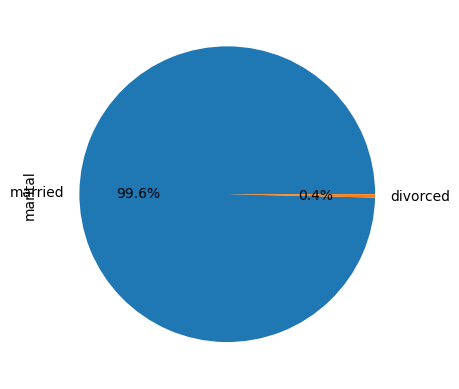

In [20]:
print(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5)]['marital'].value_counts())
df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5)]['marital'].value_counts().plot(kind='pie',autopct='%1.1f%%')

no     262
yes     12
Name: y, dtype: int64


<AxesSubplot:ylabel='y'>

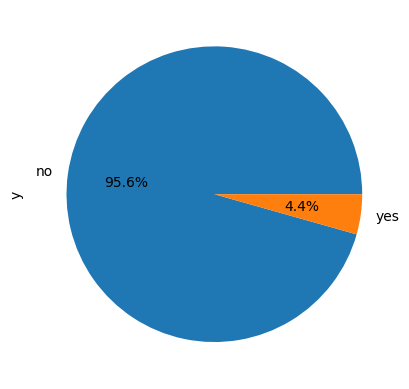

In [21]:
print(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5)]['y'].value_counts())
df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5)]['y'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = yes

let y- = no

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [22]:
# (df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5)
# p(y+|s0) -> p(yes|Proxy)
p1 = len(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5) & (df['y']=="yes")]) / len(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5)])
#print(p1)
# p(y-|s1) -> p(no|!Proxy)
p2 = len(df.loc[((df['month']!="aug") | (df['poutcome']!="unknown") | (df['campaign']<=3.5) | (df['education']!="primary") | (df['default']=="yes") | (df['day']<=6.5)) & (df['y']=="no")]) / len(df.loc[((df['month']!="aug") | (df['poutcome']!="unknown") | (df['campaign']<=3.5) | (df['education']!="primary") | (df['default']=="yes") | (df['day']<=6.5))])
#print(p2)
# p(y+|s1) -> p(yes|!Proxy)
p3 = len(df.loc[((df['month']!="aug") | (df['poutcome']!="unknown") | (df['campaign']<=3.5) | (df['education']!="primary") | (df['default']=="yes") | (df['day']<=6.5)) & (df['y']=="yes")]) / len(df.loc[((df['month']!="aug") | (df['poutcome']!="unknown") | (df['campaign']<=3.5) | (df['education']!="primary") | (df['default']=="yes") | (df['day']<=6.5))])
#print(p3)
# p(y-|s0) -> p(no|Proxy)
p4 = len(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5) & (df['y']=="no")]) / len(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.344


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = yes

let y- = no

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [23]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.373


considering that is a proxy for married, then, just consider the universe of married people

In [24]:
# (df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5)
# p(y+|s0) -> p(yes|Proxy)
p1 = len(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5) & (df['y']=="yes") & (df['marital']=="married")]) / len(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5) & (df['marital']=="married")])
#print(p1)
# p(y-|s1) -> p(no|!Proxy)
p2 = len(df.loc[((df['month']!="aug") | (df['poutcome']!="unknown") | (df['campaign']<=3.5) | (df['education']!="primary") | (df['default']=="yes") | (df['day']<=6.5)) & (df['y']=="no") & (df['marital']=="married")]) / len(df.loc[((df['month']!="aug") | (df['poutcome']!="unknown") | (df['campaign']<=3.5) | (df['education']!="primary") | (df['default']=="yes") | (df['day']<=6.5)) & (df['marital']=="married")])
#print(p2)
# p(y+|s1) -> p(yes|!Proxy)
p3 = len(df.loc[((df['month']!="aug") | (df['poutcome']!="unknown") | (df['campaign']<=3.5) | (df['education']!="primary") | (df['default']=="yes") | (df['day']<=6.5)) & (df['y']=="yes") & (df['marital']=="married")]) / len(df.loc[((df['month']!="aug") | (df['poutcome']!="unknown") | (df['campaign']<=3.5) | (df['education']!="primary") | (df['default']=="yes") | (df['day']<=6.5)) & (df['marital']=="married")])
#print(p3)
# p(y-|s0) -> p(no|Proxy)
p4 = len(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5) & (df['y']=="no") & (df['marital']=="married")]) / len(df.loc[(df['month']=="aug") & (df['poutcome']=="unknown") & (df['campaign']>3.5) & (df['education']=="primary") & (df['default']!="yes") & (df['day']>6.5) & (df['marital']=="married")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

OR: 0.406
IR: 0.432
